<a href="https://colab.research.google.com/github/shinjihirako13-vis/Elevate-Lab-Task-2/blob/main/Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer, make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [2]:
data = load_breast_cancer()
X, y = data.data, data.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
linear_model = SVC(kernel='linear', C=1)
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)
print("Linear Kernel Classification Report:")
print(classification_report(y_test, y_pred_linear))


Linear Kernel Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [7]:
rbf_model = SVC(kernel='rbf', C=1, gamma='scale')
rbf_model.fit(X_train_scaled, y_train)
y_pred_rbf = rbf_model.predict(X_test_scaled)
print("RBF Kernel Classification Report:")
print(classification_report(y_test, y_pred_rbf))

RBF Kernel Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [8]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print("Best Parameters from Grid Search:", grid.best_params_)

Best Parameters from Grid Search: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [9]:
cv_scores = cross_val_score(SVC(**grid.best_params_), X_train_scaled, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [0.97802198 0.96703297 0.98901099 0.98901099 0.95604396]
Mean CV Accuracy: 0.9758241758241759


In [10]:
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


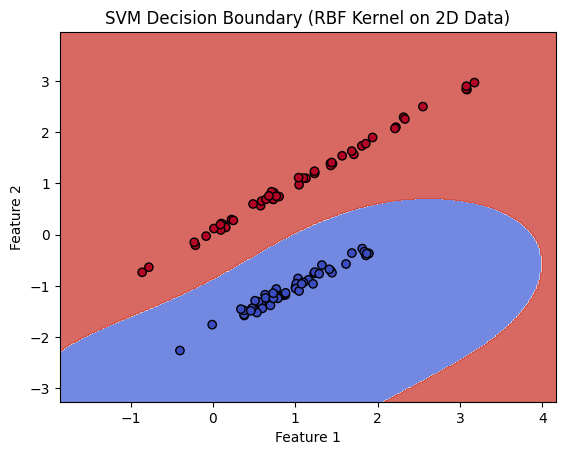

In [11]:
X_vis, y_vis = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                   n_clusters_per_class=1, random_state=42)
svc_vis = SVC(kernel='rbf', C=1, gamma='scale')
svc_vis.fit(X_vis, y_vis)
plot_decision_boundary(svc_vis, X_vis, y_vis, "SVM Decision Boundary (RBF Kernel on 2D Data)")